## IMPORT THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

## READ THE IMAGE

In [2]:
im_path = "suyms.jpg"
img=cv2.imread(im_path)

print(img.shape)

(1030, 834, 3)


## IMAGE RESIZE

In [3]:
img = cv2.resize(img , (1500 , 800))
print(img.shape)

(800, 1500, 3)


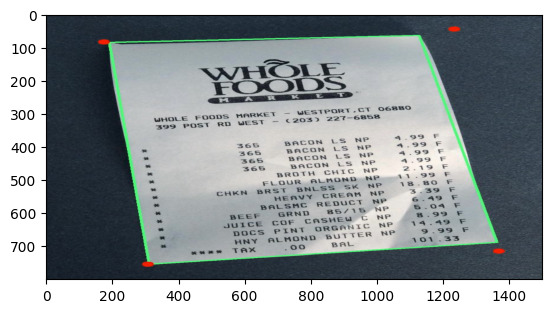

In [4]:
plt.imshow(img)
plt.show()

* Remove the Noise
* Edge Detection
* Contour Extraction
* Best Contour Selection
* Project to the screen

# REMOVE THE NOISE

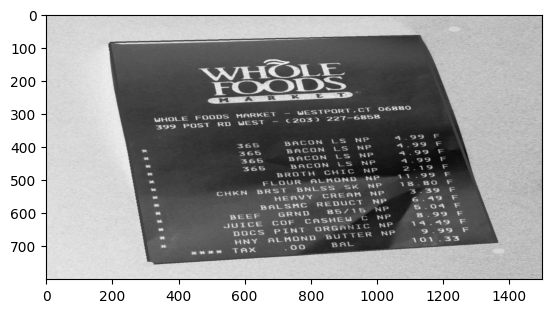

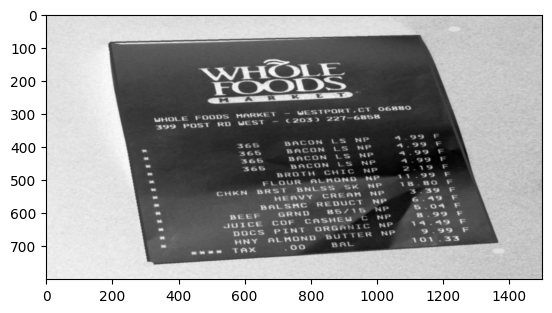

In [5]:
original_img = img.copy()
gray = cv2.cvtColor(original_img , cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap='binary')
plt.show()


blurred = cv2.GaussianBlur(gray, (5,5) , 0)
plt.imshow(blurred , cmap='binary')
plt.show()

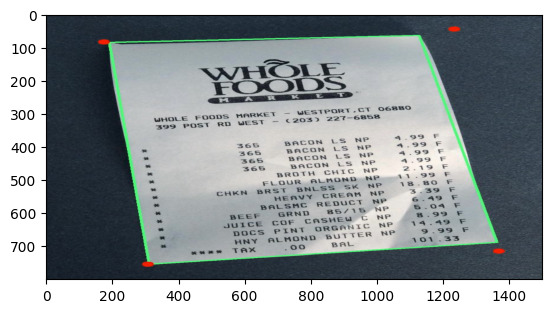

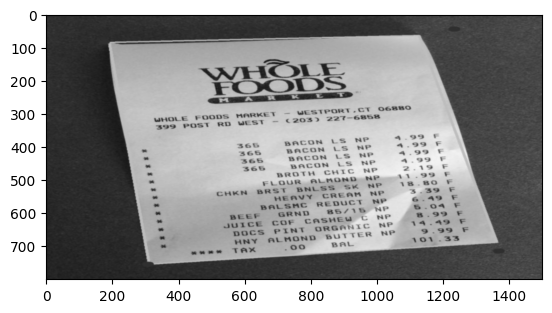

In [6]:
regen = cv2.cvtColor(blurred , cv2.COLOR_GRAY2BGR)
plt.imshow(original_img)
plt.show()


plt.imshow(regen)
plt.show()

In [7]:
regen.shape

(800, 1500, 3)

## EDGE DETECCTION

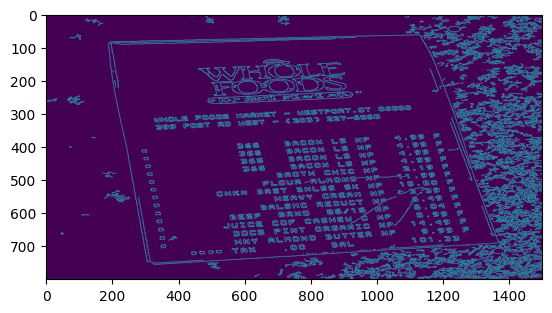

In [8]:
edge = cv2.Canny(blurred, 0,50)
orig_edge=edge.copy()

plt.imshow(orig_edge)
plt.show()

## COUNTOUR DETECTION

In [9]:
contours,_ =cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours
print(len(contours))

contours = sorted(contours , reverse=True , key =cv2.contourArea)

1986


In [10]:
# Select the best Contour Region

for c in contours:
    p=cv2.arcLength(c,True)
    approx =cv2.approxPolyDP(c,0.01*p, True)

    if len(approx) == 4:
        target = approx
        break

print(target.shape)

(4, 1, 2)


In [11]:
## Re-order taget Contour

def reorder(h):
    h = h.reshape((4,2))
    print(h)


    hnew = np.zeros((4,2), dtype = np.float32)

    add = h.sum(axis =1)
    hnew[3] = h[np.argmax(add)]
    hnew[3] = h[np.argmax(add)]

    diff = np.diff(h,axis=1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]

    return hnew

In [12]:
reorder = reorder(target)
print("*********")
print(reorder)

[[927 240]
 [526 251]
 [489 264]
 [901 253]]
*********
[[489. 264.]
 [  0.   0.]
 [489. 264.]
 [927. 240.]]


## PROJECT TO A FIXED SCREEN

In [13]:
input_representation =reorder
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [14]:
M = cv2.getPerspectiveTransform(input_representation ,output_map)
ans = cv2.warpPerspective(original_img , M, (800, 800))

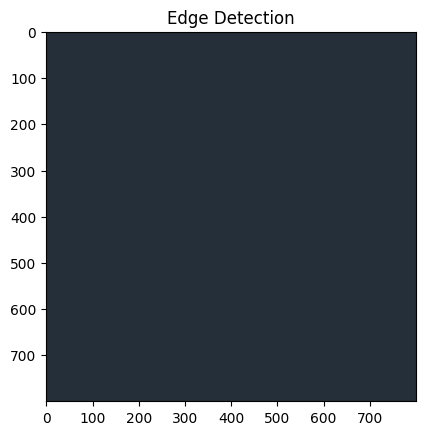

In [15]:
plt.imshow(ans)
plt.title("Edge Detection")
plt.show()